In [1]:
# imports necessary libraries and functions from the 'useful_functions.py' file
from useful_functions import *

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\carson.witt\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\carson.witt\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
# imports json file to a pandas dataframe line by line and skips the lines with improper json syntax
df = df_from_json('comment_code_data_very_small.json')
df.head()

,body,comment
0,public void execute(BatchParams batchParam...,/**\n * 处理每一条记录\n * <b>业务处理方法</b><br/>...
1,public List<Integer> getDataList(BatchPara...,/**\n * 分页处理\n * @param batchParams\n ...
2,public Stack(){\n head = null;\n },/* ---------------------- Ende der inneren Kla...
3,public DrawingPanel(){\n super();\n...,/**\n * Konstruktor\n */
4,public void addObject(DrawableObject d...,/**\n * Diese Methode fügt ein neues O...


In [3]:
# cleans each comment to just lowercase text and numbers (keeps '@')
clean_comments(df)

,body,comment,clean
0,public void execute(BatchParams batchParam...,/**\n * 处理每一条记录\n * <b>业务处理方法</b><br/>...,\n \n b b br \n getdatal...
1,public List<Integer> getDataList(BatchPara...,/**\n * 分页处理\n * @param batchParams\n ...,\n \n @param batchparams\n ...
2,public Stack(){\n head = null;\n },/* ---------------------- Ende der inneren Kla...,ende der inneren klasse
3,public DrawingPanel(){\n super();\n...,/**\n * Konstruktor\n */,\n konstruktor\n
4,public void addObject(DrawableObject d...,/**\n * Diese Methode fügt ein neues O...,\n diese methode f gt ein neues obj...
...,...,...,...
499993,public double evaluatePotential(double x) {\...,/**\n * Evaluates the potential using a step...,\n evaluates the potential using a step a...
499994,public void normalize() {\n double dx = g...,/**\n * normalize the function in place\n */,\n normalize the function in place\n
499995,public double evaluatePotential(double x) {\...,/**\n * Evaluates the potential using a step...,\n evaluates the potential using a step a...
499996,public double getDx() {\n return xmax / (...,/**\n * @return\n */,\n @return\n


In [4]:
# list of stopwords that will be removed from the comments; you can change the list as you see fit
stop = ['to', 'of', 'the', 'by', 'or', 'a', 'is', 'in', 'be', 'and', 'that', 'p', 'n', 'b']
rmv_stpwds_ret_str(df, stop)

,body,comment,clean,no stopwords
0,public void execute(BatchParams batchParam...,/**\n * 处理每一条记录\n * <b>业务处理方法</b><br/>...,\n \n b b br \n getdatal...,br getdatalist br datalist br datalist stepser...
1,public List<Integer> getDataList(BatchPara...,/**\n * 分页处理\n * @param batchParams\n ...,\n \n @param batchparams\n ...,@param batchparams @param offset @param pagesi...
2,public Stack(){\n head = null;\n },/* ---------------------- Ende der inneren Kla...,ende der inneren klasse,ende der inneren klasse
3,public DrawingPanel(){\n super();\n...,/**\n * Konstruktor\n */,\n konstruktor\n,konstruktor
4,public void addObject(DrawableObject d...,/**\n * Diese Methode fügt ein neues O...,\n diese methode f gt ein neues obj...,diese methode f gt ein neues objekt zum zeichn...
...,...,...,...,...
499993,public double evaluatePotential(double x) {\...,/**\n * Evaluates the potential using a step...,\n evaluates the potential using a step a...,evaluates potential using step at x 0 change t...
499994,public void normalize() {\n double dx = g...,/**\n * normalize the function in place\n */,\n normalize the function in place\n,normalize function place
499995,public double evaluatePotential(double x) {\...,/**\n * Evaluates the potential using a step...,\n evaluates the potential using a step a...,evaluates potential using step at x 0 change t...
499996,public double getDx() {\n return xmax / (...,/**\n * @return\n */,\n @return\n,@return


In [5]:
# combines each comment into a singular list
combined_comments = " ".join(df['no stopwords'])

In [6]:
# separates each word into individual tokens or objects
words = combined_comments.split()

In [7]:
# bow = bag of words
# ngrams is a nltk library that looks for occurances of n consecutive words in text

# counts number of occurances of each word in the combined comments, puts each word and its frequency into a dictionary
bow = Counter(words)

# same as above, but for pairs of words 
bow2 = Counter(ngrams(words,2))

# same as above, but for trigrams (3 words in a row)
bow3 = Counter(ngrams(words,3))

In [8]:
# run this if you want to see what the dictionary looks like
bow2

Counter({('br', 'getdatalist'): 3,
         ('getdatalist', 'br'): 3,
         ('br', 'datalist'): 12,
         ('datalist', 'br'): 3,
         ('datalist', 'stepservice'): 6,
         ('stepservice', 'batch'): 3,
         ('batch', 'step'): 3,
         ('step', 'br'): 5,
         ('stepservice', 'br'): 3,
         ('datalist', 'size'): 3,
         ('size', '1'): 505,
         ('1', '@param'): 1190,
         ('@param', 'index'): 2395,
         ('index', 'data'): 46,
         ('data', 'object'): 223,
         ('object', '1'): 27,
         ('@param', 'data'): 1977,
         ('data', 'getdatalist'): 3,
         ('getdatalist', '@param'): 3,
         ('@param', 'object'): 1431,
         ('object', 'getobjectlist'): 3,
         ('getobjectlist', 'object'): 3,
         ('object', '@param'): 3027,
         ('@param', 'batchparams'): 3,
         ('batchparams', '@param'): 3,
         ('@param', 'offset'): 1098,
         ('offset', '@param'): 418,
         ('@param', 'pagesize'): 112,
         

In [9]:
# using the bow's, creates 3 new pandas dataframes and sorts in descending order
word_freq = pd.DataFrame(bow.items(),columns=['word','frequency']).sort_values(by='frequency',ascending=False)
word_pairs = pd.DataFrame(bow2.items(),columns=['pairs','frequency']).sort_values(by='frequency',ascending=False)
trigrams = pd.DataFrame(bow3.items(),columns=['trigrams','frequency']).sort_values(by='frequency',ascending=False)

<AxesSubplot:xlabel='frequency', ylabel='trigrams'>

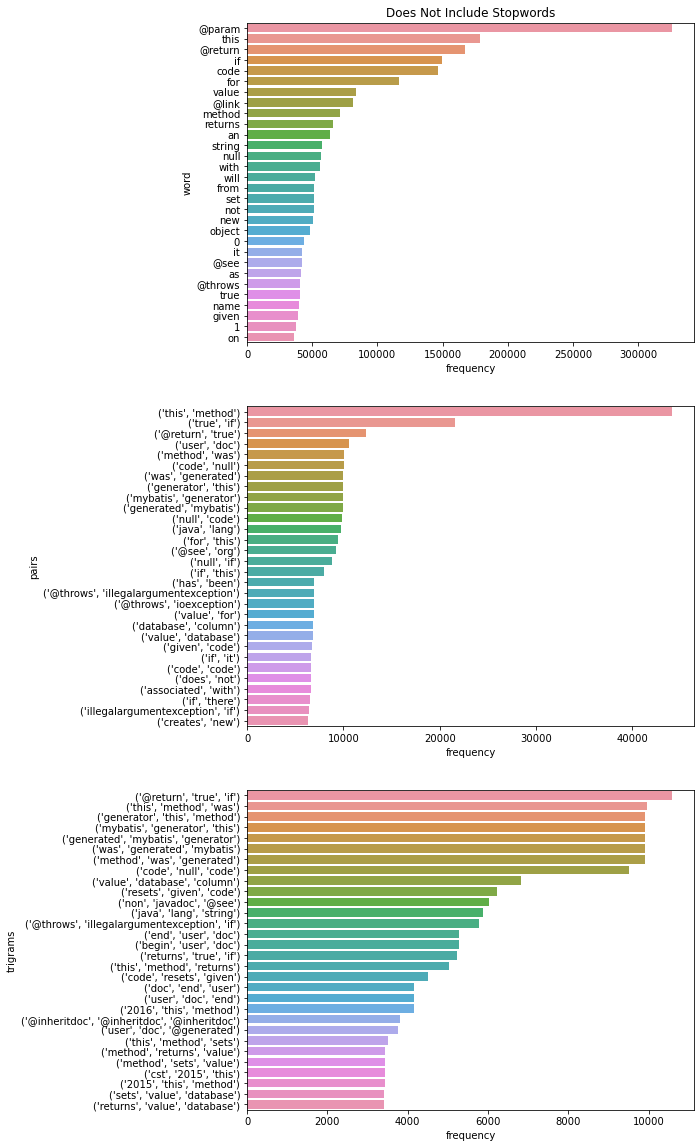

In [10]:
# creates bargraphs that show occurances of certain words, pairs, and trigrams
fig, axes = plt.subplots(3,1,figsize=(8,20))
sns.barplot(ax=axes[0],x='frequency',y='word',data=word_freq.head(30)).set_title('Does Not Include Stopwords')
sns.barplot(ax=axes[1],x='frequency',y='pairs',data=word_pairs.head(30))
sns.barplot(ax=axes[2],x='frequency',y='trigrams',data=trigrams.head(30))